<a href="https://colab.research.google.com/github/suzzini/DA_Study/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.7MB/s 


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **랜덤포레스트(RandomForest)**

- 앙상블 모델 중 하나
  - 앙상블 : **여러 기본 모델을 만들어** 예측결과를 그들의 다수결이나 평균으로 결론을 냄(랜덤포레스트는 결정트리를 기본 모델로 함)
  - 결정 트리는 독립적으로 생성됨
- 배깅(Bagging, Bootstrap Aggregating)
  - Bootstrap : 원본 데이터에서 **샘플링**을 하는데 복원추출을 함(같은 샘플이 반복될 수 있음)
  - Aggregation : 부트스트랩세트로 만들어진 기본모델들을 **합치는 과정**
    - 분류문제 : 다수결로 가장 많은 모델들이 선택한 범주로 예측
    - 회귀문제 : 기본모델 결과들의 평균으로 결과를 냄 

In [4]:
df=pd.read_csv('heart.csv')
# https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [5]:
from sklearn.model_selection import train_test_split

target='output'
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)
#train, test의 비율 8/2
#훈련데이터를 나눌 때 무작위로 샘플링을 하되, original dataset의 클래스 비율이 train, test set에서도 동일하게 유지되는 것을 보장한다

train.shape, test.shape

((242, 14), (61, 14))

In [6]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

**Random Forest**
- class_weight : 불균형(imbalanced) 클래스인 경우
- max_depth : 너무 깊어지면 과적합
- n_estimators : 적을경우 과소적합, 높을경우 긴 학습시간
- min_samples_leaf : 과적합일경우 높임
- max_features : 줄일 수록 다양한 트리생성
- oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    #OrdinalEncoder(), 
    #SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_test, y_test))

훈련 정확도:  1.0
검증 정확도 0.7868852459016393


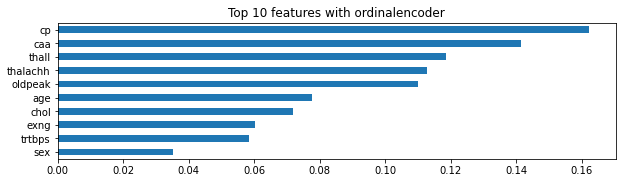

In [13]:
import matplotlib.pyplot as plt

rf = pipe_ord.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf.feature_importances_, X_train.columns)
n=10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();


## Randomized Search CV


> - GridSearchCV: 검증하고 싶은 하이퍼파라미터들의 수치를 정해주고 그 조합을 모두 검증합니다. 
- RandomizedSearchCV: 검증하려는 하이퍼파라미터들의 값 범위를 지정해주면 무작위로 값을 지정해 그 조합을 모두 검증합니다.





In [22]:
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'randomforestclassifier__n_estimators': [50,100,150,200], 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__min_samples_leaf' : [5,10,15,20] 
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, #150번 수행한거임 50*3
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   40.2s finished


In [23]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1_score: ', clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__max_depth': None}
f1_score:  0.8611025772316094


랭크별로 하이퍼파라미터 조합 확인하기



In [24]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,29,12,33,30,23,9,24,36,27,11,13,45,34,17,0,10,43,39,8,38,2,4,14,16,46,49,48,37,28,1,25,15,5,7,20,3,35,41,22,31,6,19,32,47,21,44,42,26,18,40
mean_fit_time,0.166186,0.152757,0.154754,0.157916,0.155324,0.164057,0.330331,0.325799,0.309028,0.318906,0.150364,0.458395,0.45726,0.474703,0.481984,0.637894,0.664865,0.65477,0.644032,0.324795,0.315631,0.324979,0.303881,0.59772,0.604461,0.467817,0.462359,0.49877,0.454402,0.474089,0.480088,0.315021,0.331961,0.330533,0.302933,0.334196,0.343339,0.328813,0.161717,0.154476,0.623754,0.478276,0.497728,0.324116,0.636425,0.654188,0.646459,0.627064,0.600839,0.688343
std_fit_time,0.00868508,0.00323971,0.00549882,0.00762968,0.00730973,0.00790407,0.0136202,0.00553236,0.00867598,0.0063372,0.0052304,0.0142513,0.0162812,0.0184582,0.0151932,0.0493735,0.00417217,0.01008,0.0209924,0.0168884,0.00341114,0.00828589,0.00432962,0.0239801,0.0264004,0.00206899,0.00709102,0.00535734,0.0116904,0.0186049,0.00942555,0.00213553,0.00803418,0.0179909,0.00384638,0.00733056,0.0041555,0.00720698,0.00849362,0.00815089,0.0208718,0.0253522,0.0288504,0.00846758,0.0462954,0.0272288,0.0044528,0.0287045,0.0214703,0.0164778
mean_score_time,0.106549,0.104168,0.103984,0.105819,0.104076,0.104554,0.104588,0.104518,0.10411,0.10458,0.104182,0.103755,0.104368,0.103921,0.104208,0.104288,0.105031,0.104862,0.104376,0.104493,0.104899,0.105332,0.104139,0.104449,0.104402,0.104204,0.104251,0.104507,0.104769,0.104183,0.104681,0.105071,0.105103,0.104506,0.103818,0.104985,0.106358,0.104475,0.1045,0.104037,0.104479,0.10525,0.106588,0.10404,0.105077,0.104403,0.104378,0.104158,0.104509,0.104705
std_score_time,0.00308204,8.61001e-05,0.000245183,0.00251911,0.000430795,0.000131552,0.000272495,0.000178337,0.000534496,0.000574662,0.000147255,0.000260475,0.000658762,0.000230683,0.000346746,0.000522044,0.00128856,0.000276526,0.000491031,0.000146648,0.000359353,0.00102548,0.000397658,0.000179088,0.00012603,0.000495344,0.00035155,0.000110097,0.00101037,0.000538139,7.28425e-05,0.00112826,0.000682222,0.000330128,0.000132285,0.000910598,0.00237231,0.000257118,0.000436357,0.000325321,0.000866125,0.00113551,0.00364611,0.000311414,0.00136818,0.000625099,0.000260006,0.000408341,0.000187301,0.000389783
param_randomforestclassifier__n_estimators,50,50,50,50,50,50,100,100,100,100,50,150,150,150,150,200,200,200,200,100,100,100,100,200,200,150,150,150,150,150,150,100,100,100,100,100,100,100,50,50,200,150,150,100,200,200,200,200,200,200
param_randomforestclassifier__min_samples_leaf,10,10,20,20,20,20,20,20,20,20,10,20,20,20,20,20,20,20,20,15,15,15,15,15,15,15,15,15,15,10,10,10,10,10,10,5,5,5,5,5,10,5,5,5,10,10,10,5,5,5
param_randomforestclassifier__max_depth,15,None,15,20,None,5,10,5,None,15,5,5,10,None,15,15,None,10,5,20,5,None,10,10,20,10,None,20,15,20,None,20,5,None,10,None,20,15,5,15,5,10,None,5,10,20,None,None,20,15
params,"{'randomforestclassifier__n_estimators': 50, '...","{'randomforestclassifier__n_estimators': 50, '...","{'randomforestclassifier__n_estimators': 50, '...","{'randomforestclassifier__n_estimators': 50, '...","{'randomforestclassifier__n_estimators': 50, '...","{'randomforestclassifier__n_estimators': 50, '...","{'randomforestclassifier__n_estimators': 100, ...","{'randomforestclassifier__n_estimators': 100, ...","{'randomforestclassifier__n_estimators': 100, ...","{'randomforestclassifier__n_estimators': 100, ...","{'randomforestclassifier__n_estimators': 50, '...","{'randomforestclassifier__n_estimators': 150, ...","{'randomforestclassifier__n_estimators': 150, ...","{'randomforestclassifier__n_estimators': 150, ...","{'randomforestclassifier__n_estimators': 150, ...","{'randomforestclassifier__n_estimators': 200, ...","{'randomforestclassifier__n_estimators': 200, ...","{'randomforestclassifier__n_estimators': 200, ...","{'randomforestclassifier__n_estimators': 200, ...","{'randomforestclassifier__n_estimators': 100, ...","{'randomforestclassifier__n_estimators': 100, ...","{'randomforestclassifier__n_estimators': 100, ...","{'randomforestclassifie

3번의 교차검증 했음을 확인할 수 있음(아래에서 설명 계속)

In [25]:
#최적의 파라미터를 모델로 생성
pipe = clf.best_estimator_

bestestimator 는 CV가 끝난 후 찾은 best parameter를 사용해 모든 학습데이터(all the training data)를 가지고 다시 학습(refit)한 상태임.

(randomized search의 refit 파라미터가 default로 True로 되어 있음.)

In [28]:
from sklearn.metrics import f1_score

y_pred = pipe.predict(X_test)
print('f1_score : ',f1_score(y_test, y_pred))

f1_score :  0.8


In [29]:
pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.8925619834710744
검증 정확도:  0.7868852459016393


## 교차검증이란 ?
- sklearn에서는 교차검증을 위해 cross_val_score 함수를 제공
- 보통 회귀 모델에 사용되며, 데이터가 독립적이고 동일한 분포를 가진 경우에 사용된다

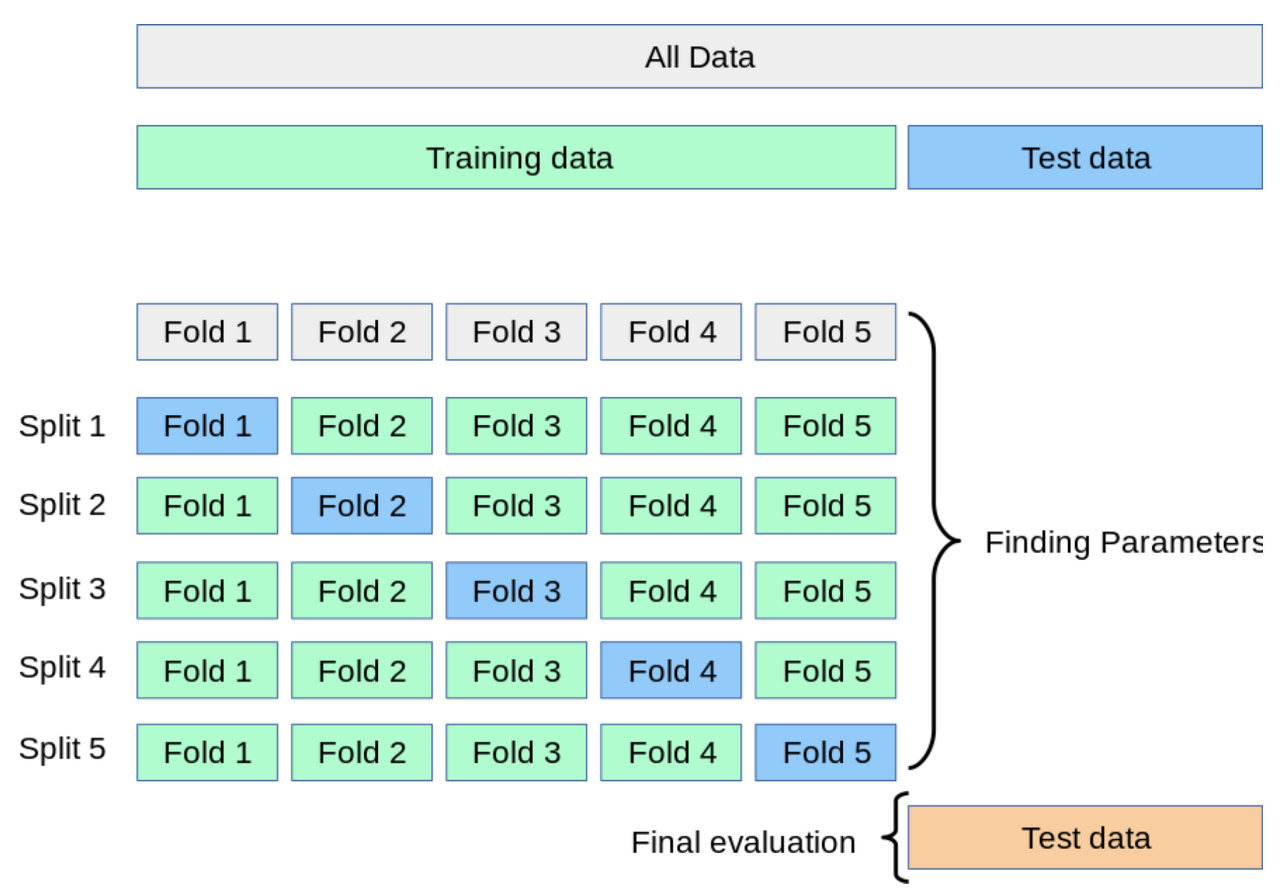

1. 전체 데이터셋을 Training Set과 Test Set으로 나눈다.
2. Training Set를 Traing Set + Validation Set으로 사용하기 위해 k개의 폴드로 나눈다.
3. 첫 번째 폴드를 Validation Set으로 사용하고 나머지 폴드들을 Training Set으로 사용한다.
4. 모델을 Training한 뒤, 첫 번 째 Validation Set으로 평가한다.
5. 차례대로 다음 폴드를 Validation Set으로 사용하며 3번을 반복한다.
6. 총 k 개의 성능 결과가 나오며, 이 k개의 평균을 해당 학습 모델의 성능이라고 한다.

randomized search나 grid search의 cv의 파라미터를 이용하여 사용 가능